### 분류 실습 - 캐글 신용카드 사기 검출

- 캐글의 신용카드 데이터 세트를 이용해 신용카드 사기 검출 분류 실습
- 코드의 빈칸(###) 채우거나 물음에 답하면 됨

1. 데이터 일차 가공 및 모델 학습/예측/평가
2. 이상치 데이터 제거 후 모델 학습/예측/평가

#### 1. 데이터 일차 가공 및 모델 학습/예측/평가

밑의 주소를 클릭하여 creaditcard.csv 파일 다운받기 \
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
# 다운로드 받은 creditcard.csv 파일을 DataFrame 으로 로딩하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore") 
%matplotlib inline

card_df = pd.read_csv('creditcard.csv') 
card_df.####()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

- Amount 피처는 신용카드 트랜잭션 금액을 의미
- Class 는 레이블로서 0의 경우 정상, 1의 경우 사기 트랜잭션

In [5]:
# info() 를 사용하여 데이터의 결측치와 형태 확인하는 코드 작성하기

In [49]:
# 예측 성능을 비교하기 위해 인자로 인력된 DataFrame 을 복사한 뒤 이를 가공하여 반환하는 get_preprocessed_df() 함수와
# 데이터 가공 후 학습/테스트 데이터 세트를 반환하는 get_train_test_df() 함수 생성

from sklearn.model_selection import ################

# Time 피처는 데이터 생성 관련한 작업용 속성으로서 큰 의미가 없기 때문에 제거하는 코드 작성
# 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame 반환 

def get_preprocessed_df(df=None) :
    df_copy = df.copy()
    df_copy.####('Time', axis=1, inplace=True)
    return df_copy

In [50]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    
    # DataFrame의 맨 마지막 칼럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할 
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = #####################(card_df)

In [51]:
# 생성한 학습 데이터 세트와 테스트 데이터 세트의 레이블 값 비율을 백분율로 환산해서 서로 비슷하게 분할 되었는지 확인하는 코드 작성하기

In [52]:
# 로지스틱 회귀를 이용해 신용 카드 사기 여부를 예측하기
from sklearn.linear_model import ##################

lr_clf = ##################(max_iter=1000) 
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 정확도, 오차행렬, 정밀도, 재현율, F1 score, AUC 출력하는 get_clf_eval 함수 생성하고 출력하기
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import #############


def get_clf_eval(y_test, pred=None, pred_proba=None): 
    confusion = confusion_matrix(y_test, pred) 
    accuracy = accuracy_score(y_test , pred) 
    precision = precision_score(y_test , pred) 
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = #############(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 : {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081, F1 : 0.7143, AUC:0.9713


In [23]:
# 이 문제의 경우 정밀도와 재현율 중 어떤 것의 수치가 더 중요한지 이유와 함께 적어보기

In [26]:
# LightGBM을 이용하여 모델 만들기

# 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력받아서 학습/예측/평가 수행. 
def get_model_train_eval(#####, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    #####.fit(ftr_train, tgt_train)
    pred = #####.predict(ftr_test)
    pred_proba = #####.predict_proba(ftr_test)[:, 1] 
    get_clf_eval(tgt_test, pred, pred_proba)

In [33]:
# LightGBM으로 모델을 학습한 뒤 별도의 테스트 데이터 세트에서 예측 평가 수행
import warnings 
warnings.filterwarnings("ignore") 
%matplotlib inline
from lightgbm import ##############

import lightgbm as lgb

lgbm_params = {
    'verbosity': -1,  # 더 이상 경고 메시지 출력하지 않음
    'force_col_wise': True,  # 경고 메시지 제거를 위한 추가 설정
    # 다른 파라미터들...
}

lgbm_clf = ##############(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, **lgbm_params) 
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,F1 : 0.8453, AUC:0.9790


In [34]:
# 위의 출력결과를 로지스틱 회귀와 비교하여 정밀도와 재현율이 어떻게 다른지 또는 어떤 모델이 더 적합한지 적어보기

#### 2. 이상치 데이터 제거 후 모델 학습/예측/평가

<AxesSubplot:>

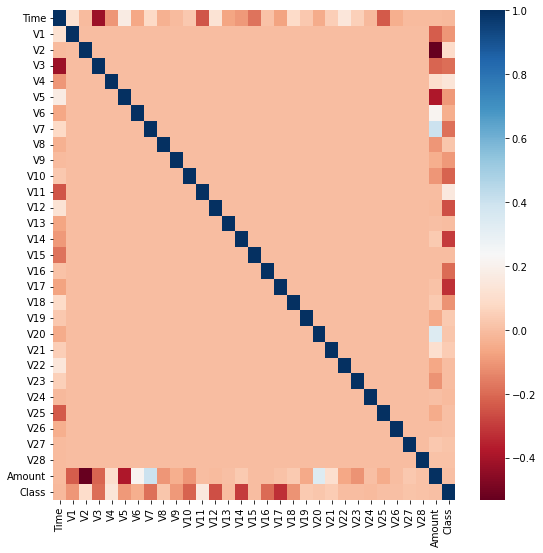

In [36]:
# 이상치 데이터를 IQR 을 이용해 제거해보기
# 어떤 피처에서의 이상치 데이터를 검출할 것인지 선택이 필요하기 때문에 heatmap 을 활용해 레이블과 가장 상관성이 높은 피처를 찾아내
# 해당 피처의 이상치를 제거하기 

import seaborn as sns
plt.figure(figsize=(9, 9)) 
corr = card_df.####() 
sns.#######(corr, cmap='RdBu')

In [37]:
# 레이블과 상관성이 높은 피처가 무엇인지 작성하기

In [41]:
# V14에 대해서만 이상치를 찾아서 제거해보기

import numpy as np
# get_outlier() 함수는 인자로 DataFrame과 이상치를 검출한 칼럼을 입력받는다. 
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    # 함수 내에서 넘파이의 percentile()을 이용해 1/4 분위와 3/4 분위를 구하고, 이에 기반해 IQR을 계산한다.
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱해 최댓값과 최솟값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame index 반환. 
    outlier_index = fraud [(fraud < ########) | (fraud > #########)].index
    return outlier_index

outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', ###########)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [43]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.######(0, 'Amount_Scaled', amount_n) 
    df_copy.####(['Time', 'Amount'], axis=1, inplace=True)

    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5) 
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                     tgt_test=y_test) 
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,F1 : 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,F1 : 0.8897, AUC:0.9780


In [44]:
# 이상치 데이터를 제거한 뒤의 로지스틱 회귀와 LightGBM 의 예측 성능이 어떻게 변화되었는지 작성해보기기